# Data Preparation and synthethize networks of different classes

In this chapter we are going to prepare the data for the next chapters.
We will also create a synthetic network of each class.

Different Datasets:

- MS2265: Mass spectral database NIST
- N9: Exhausitve, non-isomorphic, connected graph with 9 vertices (Nauty)
- T15: Exhausitve, non-isomorphic, connected tree-graph with 15 vertices (Nauty)


## Create a set of graphs from "On structure-sensitivity of degree-based topological indices"

Let $G$ be a graph. Start be settings $\mathscr{S}(G) = \emptyset$. Delete from $G$ an edge and insert into it another edge. Do this in all possible ways.

Let $G'$ be a graph obtained by delete from $G$ an edge, and by inserting into it another edge. If $G'$ is not connected, then disregard it. If $G' \cong G$ (isomorphic) then disregard $G'$.
If $G'$ is connected, check wether it is isomorphic to any of the elements of $\mathscr{S}(G)$. If yes, disregard it. If not, include $G'$ into the set $\mathscr{S}(G)$.

Do the transformation $G \rightarrow G'$ in all possible ways.


In [ ]:
import networkx as nx

import matplotlib.pyplot as plt


## Importing Data

Im ./data Verzeichnis befinden sich alle Graphen als bliss oder g6 Dateien.
Wir importieren diese und speichern sie in einer Liste.

### Beschreibung der Daten

- all_graphs
  - Format: .g6
  - Beschreibung: Alle graphen bis zu 9 Knoten
  - Quelle: [Brendan McKay](http://users.cecs.anu.edu.au/~bdm/data/graphs.html)
- complete
  - Format: DIMACS
  - Beschreibung: Alle vollständigen Graphen bis zu 100 Knoten
  - Quelle: networkx / Luca Hostettler
- hypercubes
  - Format: DIMACS
  - Beschreibung: Alle Hypercubes 3 bis 21 "dimensional"
  - Quelle: networkx / Luca Hostettler
- ran2, ran10, ransq
  - Format: DIMACS
  - Beschreibung: Kanten mit Wahrscheinlichkeit $frac(1/2)$, $frac(110)$, $1/sqrt(n)$, $5-5000$, $10 - 10000$, $2^5 - 2^17$ Knoten
  - Quelle: [Brendan McKay](http://users.cecs.anu.edu.au/~bdm/data/graphs.html)
- ranreg:
  - Format: DIMACS
  - Beschreibung: Random reguläre Graphen
  - Quelle: [Brendan McKay](http://users.cecs.anu.edu.au/~bdm/data/graphs.html)
- rantree:
  - Format: DIMACS
  - Beschreibung: Random Bäume
  - Quelle: [Brendan McKay](http://users.cecs.anu.edu.au/~bdm/data/graphs.html)
- traing:
  - Format: DIMACS
  - Beschreibung: Trianguläre Graphen
  - Quelle: [Universität Roma](https://pallini.di.uniroma1.it)


## Data-Preparation

Wir konvertieren alle Graphen in ein einheitliches Format (g6) welches von NetworkX verwendet werden kann.
Dazu verwenden wir die Funktion `convert_to_g6` welche die Graphen aus dem DIMACS Format in das g6 Format konvertiert.

In [ ]:
import glob
# function to convert the DIMACS graph to a edgelist

# list all .gr files in the data folder and convert each file to edgelist
for file in glob.glob("./data/**/*.dimacs"):
    # remove the 'e ' from the beginning of each line starting with 'e ' and save as .edgelist file
    with open(file) as dimacs_file:
        lines = dimacs_file.readlines()
    with open(file.replace('.dimacs', '.edgelist'), 'w') as edgelist_file:
        for line in lines:
            if line.startswith('e '):
                edgelist_file.write(line[2:])


In [ ]:
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [ ]:
# DataSet für alle Graphen erstellen

dataSets = {}

dataSets["all_graphs"] = {}
dataSets["complete"] = {}
dataSets["hypercubes"] = {}
dataSets["ran2"] = {}
dataSets["ran10"] = {}
dataSets["ransq"] = {}
dataSets["ranreg"] = {}
dataSets["rantree"] = {}
dataSets["triang"] = {}

In [ ]:
from pathlib import Path
import glob
import networkx as nx

# Runs around 12 minutes

# Importiere All_Graphs
g6_without_10_11 = glob.glob("./data/all_graphs/[2-8].g6")
l = len(g6_without_10_11)
for (i, f) in enumerate(g6_without_10_11):
    filename = Path(f).stem
    graphs = nx.read_graph6(f)
    printProgressBar(i + 1, l, prefix = 'All_Graphs Progress:', suffix = 'Complete', length = 50)
    if type(graphs) == nx.classes.graph.Graph:
        dataSets["all_graphs"][filename] = graphs
    elif type(graphs) == list:
        k = len(graphs)
        for (j, graph) in enumerate(graphs):
            printProgressBar(j + 1, k, prefix = f"All_Graphs {filename} Progress:", suffix = 'Complete', length = 50)
            dataSets["all_graphs"][f"{filename}_{j}"] = graph

# Importiere Complete
l = len(glob.glob("./data/complete/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/complete/*.edgelist")):
    filename = Path(f).stem
    dataSets["complete"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'complete Progress:', suffix = 'Complete', length = 50)

# Importiere Hypercubes
l = len(glob.glob("./data/hypercubes/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/hypercubes/*.edgelist")):
    filename = Path(f).stem
    dataSets["hypercubes"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'hypercubes Progress:', suffix = 'Complete', length = 50)

# Importiere ran2
l = len(glob.glob("./data/ran2/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/ran2/*.edgelist")):
    filename = Path(f).stem
    dataSets["ran2"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'ran2 Progress:', suffix = 'Complete', length = 50)

# Importiere ran10
l = len(glob.glob("./data/ran10/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/ran10/*.edgelist")):
    filename = Path(f).stem
    dataSets["ran10"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'ran10 Progress:', suffix = 'Complete', length = 50)

# Importiere ransq
l = len(glob.glob("./data/ransq/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/ransq/*.edgelist")):
    filename = Path(f).stem
    dataSets["ransq"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'ransq Progress:', suffix = 'Complete', length = 50)

# Importiere ranreg
l = len(glob.glob("./data/ranreg/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/ranreg/*.edgelist")):
    filename = Path(f).stem
    dataSets["ranreg"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'ranreg Progress:', suffix = 'Complete', length = 50)

# Importiere rantree
l = len(glob.glob("./data/rantree/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/rantree/*.edgelist")):
    filename = Path(f).stem
    dataSets["rantree"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'rantree Progress:', suffix = 'Complete', length = 50)

# Importiere triang
l = len(glob.glob("./data/triang/*.edgelist"))
for (i, f) in enumerate(glob.glob("./data/triang/*.edgelist")):
    filename = Path(f).stem
    dataSets["triang"][filename] = nx.read_edgelist(f)
    printProgressBar(i + 1, l, prefix = 'triang Progress:', suffix = 'Complete', length = 50)


### Store DataSets

In [ ]:
# around 14 min

%store dataSets

In [2]:
# 9 min

%store -r dataSets

In [3]:
# order the dataSet by keys recursively
# keys are string containing numbers inside the string
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

def orderDict(d):
    for k, v in d.items():
        if type(v) == dict:
            d[k] = orderDict(v)
    return {k: v for k, v in sorted(d.items(), key=lambda item: natural_keys(item[0]))}


orderedDataSets = orderDict(dataSets)


## Explorative Data Analysis

Wir widmen uns nun den Graphen und versuchen ein Gefühl für die Daten zu bekommen. \
Dazu verwenden wir die Funktion `plot_graphs` welche zufällige Grapghen von allen Typen in einem Grid plottet.

In [ ]:
# plot one graph of each subtype of the dataset in a grid
import networkx as nx
import matplotlib.pyplot as plt
import random

def plot_all_graphs(dataSet):
    rows = 3
    cols = 3
    fig, axs = plt.subplots(rows, cols, figsize=(15, 15))
    for (i, subType) in enumerate(dataSet):

        # get random graph of the subtype
        if len(dataSet[subType].keys()) == 0:
            continue

        # random_graph_key = random.choice(list(dataSet[subType].keys()))
        random_graph_key = list(dataSet[subType].keys())[3]
        graph = dataSet[subType][random_graph_key]

        # break if no graph found for subtype
        if len(graph) == 0:
            continue
        # if we have a list of graphs, take the first one
        if not isinstance(graph, nx.Graph):
            graph = graph[0]
        
        # plot graph in the grid
        nx.draw(graph, ax=axs[i // cols, i % cols], node_size=15)
        axs[i // cols, i % cols].set_title(f"{subType} - {random_graph_key}")
    plt.show()

# plot all graphs of the dataset
plot_all_graphs(orderedDataSets)

## Analyse der topologischen Indices der Graphen

Wir wollen nun die topologischen Indices der Graphen untersuchen. Dazu verwenden wir die Funktion `plot_indices` welche die topologischen Indices der Graphen in einem Grid plottet. \
Dazu erstellen wir die Funktion `topological_indices` welche die topologischen Indices der Graphen berechnet. \
Die Funktion erhält einen Graphen und gibt ein Dictionary zurück, welches die topologischen Indices enthält.

### Topologische Indices

- Wiener Index
  - Beschreibung: Summe der kürzesten Pfade zwischen allen Knotenpaaren
- Randic Index
  - Beschreibung: Misst die Relationen zwischen Knoten und Kanten in einem Graphen
- Erster Zagreb Index
  - Beschreibung: Der erste Zagreb Index wird berechnet, indem man die Summe der Quadrate der Knotengrade dividiert durch die Anzahl Knoten teilt.
- Zweiter Zagreb Index
  - Der zweite Zagreb Index wird berechnet, indem man die Summe der Knotengrade durch die Anzahl der Knoten teilt.
- Hosoya Index
  - Beschreibung: Er wird berechnet, indem man die Summe der Knotengrade durch die Anzahl der Kanten teilt.
- Balaban J Index
  - Beschreibung: Misst die Ähnlichkeit zwischen den lokalen Strukturen von Graphen

- Generalized Randic Index
  - Beschreibung: Summe der Eigenwerte der Laplace Matrix
- Harmonic Index
  - Beschreibung: Summe der Inverse der Eigenwerte der Laplace Matrix
- Atom Bond Connectivity Index
  - Beschreibung: Summe der Inverse der Eigenwerte der Adjazenzmatrix
- Sum Connectivity Index
  - Beschreibung: Summe der Inverse der Eigenwerte der Adjazenzmatrix


In [ ]:
# 70 min without wiener index
# wiener is not fast enough for ran and hypercubes, we skip it for now

import grinpy as gp

def get_topological_indices(G):
    ''' Create a dictionary with the topological indices of a graph G.'''
    topological_indices = {}
    # topological_indices['wiener_index'] = gp.wiener_index(G)
    topological_indices['randic_index'] = gp.randic_index(G)
    topological_indices['generalized_randic_index'] = gp.generalized_randic_index(G, 2)
    topological_indices['harmonic_index'] = gp.harmonic_index(G)
    topological_indices['atom_bond_connectivity_index'] = gp.atom_bond_connectivity_index(G)
    topological_indices['sum_connectivity_index'] = gp.sum_connectivity_index(G)
    topological_indices['first_zagreb_index'] = gp.first_zagreb_index(G)
    topological_indices['second_zagreb_index'] = gp.second_zagreb_index(G)

    return topological_indices

def topological_indices_all_graphs(dataSet):
    ''' Create a dictionary with the topological indices of all graphs in the dataset.'''
    topological_indices = {}
    for subType in dataSet:

        #if subType == "all_graphs" or subType == "complete" or subType == "rantree":
        topological_indices[subType] = {}
        l = len(dataSet[subType])
        for (i, graph) in enumerate(dataSet[subType]):
            topological_indices[subType][graph] = get_topological_indices(dataSet[subType][graph])
            printProgressBar(i + 1, l, prefix = f'{subType} Progress:', suffix = 'Complete', length = 50)
    return topological_indices

topological_indices_all_graphs = topological_indices_all_graphs(dataSets)

print("done")

In [ ]:
%store topological_indices_all_graphs

In [1]:
%store -r topological_indices_all_graphs

## Analyse der topologischen Indices der Graphen

Wir verwenden matplotlib um die topologischen Indices der Graphen zu plotten. \
Dazu erstellen wir die Funktion `plot_indices` welche die topologischen Indices der Graphen in einem Grid plottet. \

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_topological_indices(dataSet, topological_indices):
    ''' Plot the topological indices of all graphs in the dataset.'''
    for subType in dataSet:
        for (i, graph) in enumerate(dataSet[subType]):

            # create 2 figures, one for the graph, and one histogram for the topological indices
            gs_kw = dict(width_ratios=[1, 5])
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw=gs_kw)

            # plot graph
            nx.draw(dataSet[subType][graph], ax=ax1, node_size=15)
            ax1.set_title(f"{subType} - {graph}")

            # plot histogram of topological indices and write the keys of the dictionary as histogram title

            ax2.hist(topological_indices[subType][graph].values(), label=topological_indices[subType][graph].keys())
            ax2.set_title(f"{subType} - {graph}")

            plt.show()

            if i == 4:
                return

plot_topological_indices(orderedDataSets, topological_indices_all_graphs)

In [ ]:
# print the first 15 graphs of the orderedDataSet all_graphs subType

import networkx as nx
import matplotlib.pyplot as plt

def plot_all_graphs(axs, dataSet):

    for (i, graph) in enumerate(dataSet["all_graphs"]):
        if i == 15:
            return

        # plot graph in the grid
        nx.draw(dataSet["all_graphs"][graph], ax=axs[i // 3, i % 3], node_size=15)
        axs[i // 3, i % 3].set_title(f"{i}")

rows = 5
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(7, 7))
plot_all_graphs(axs, orderedDataSets)
plt.show()


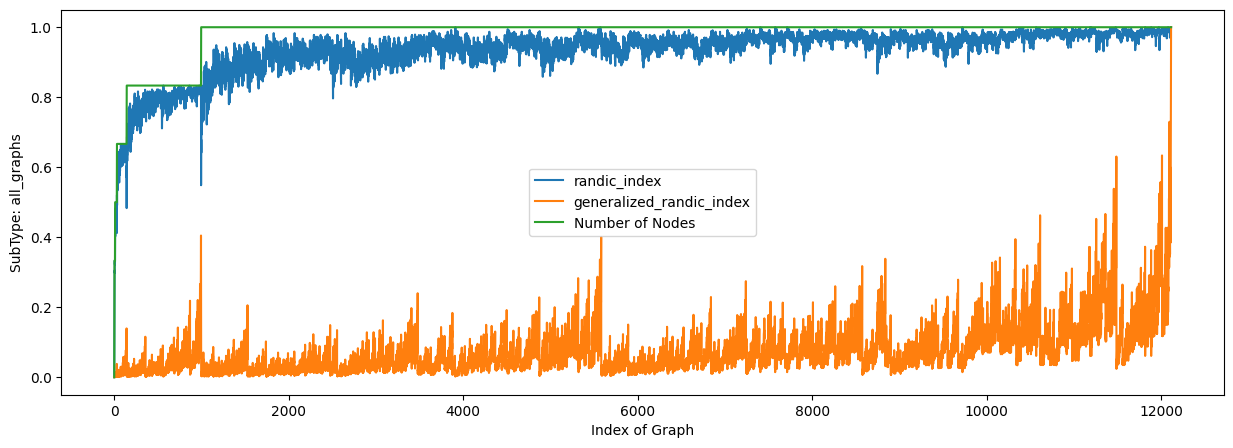

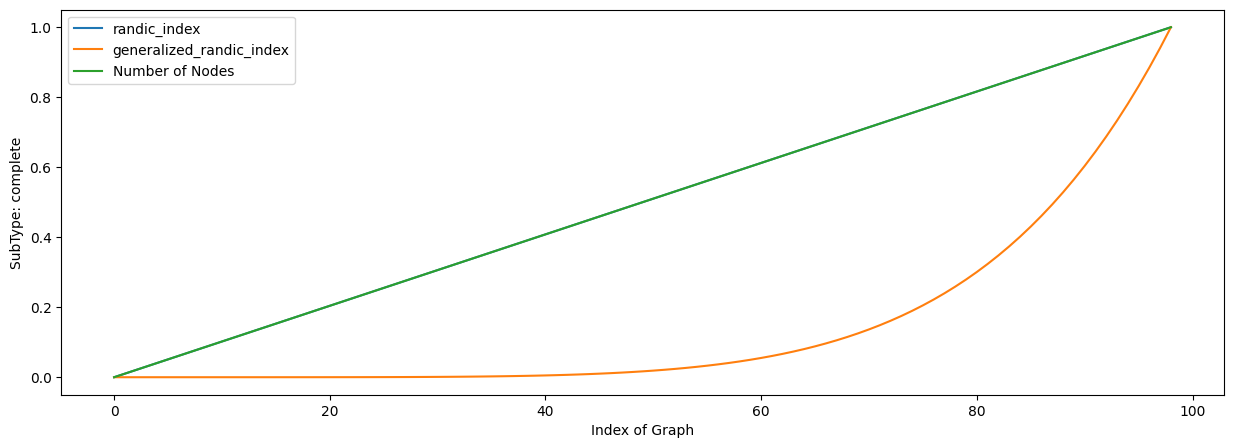

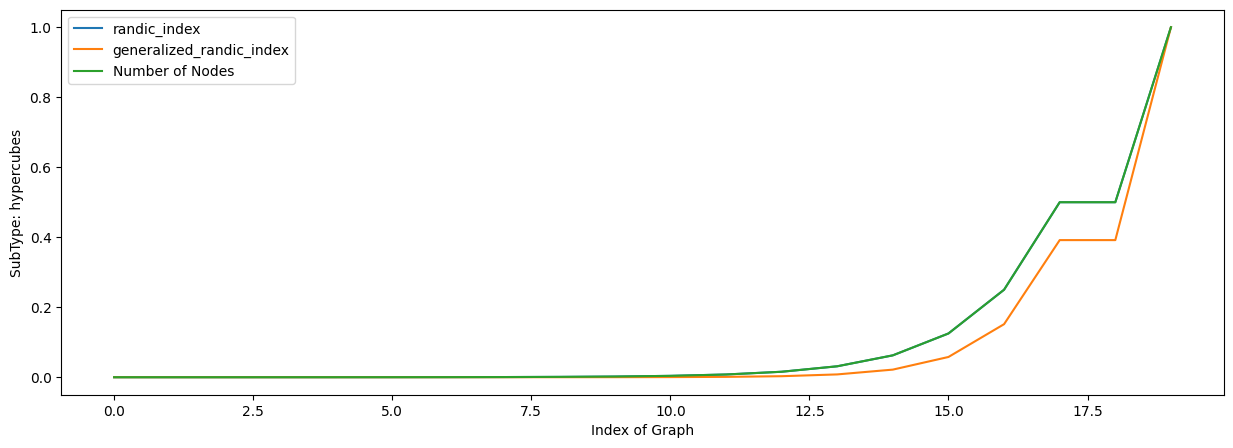

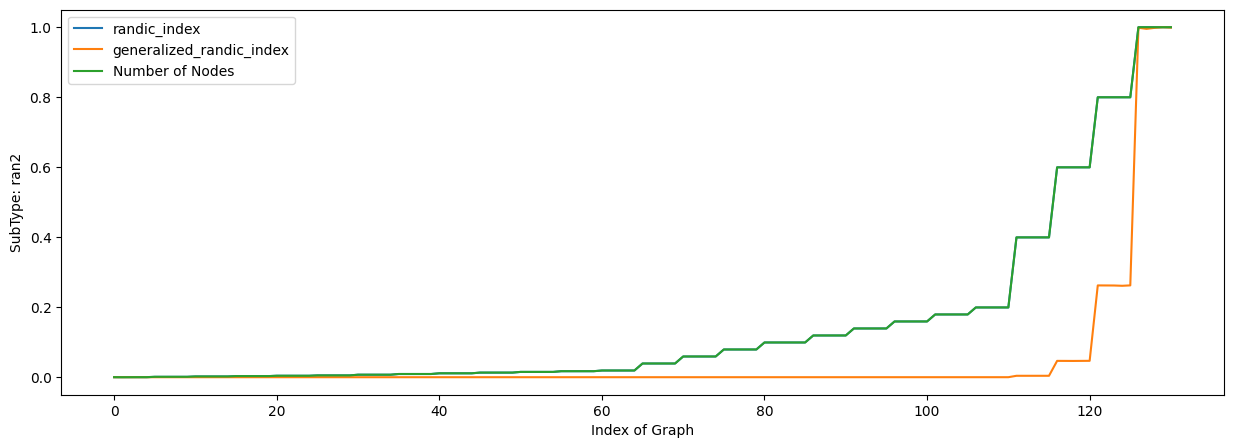

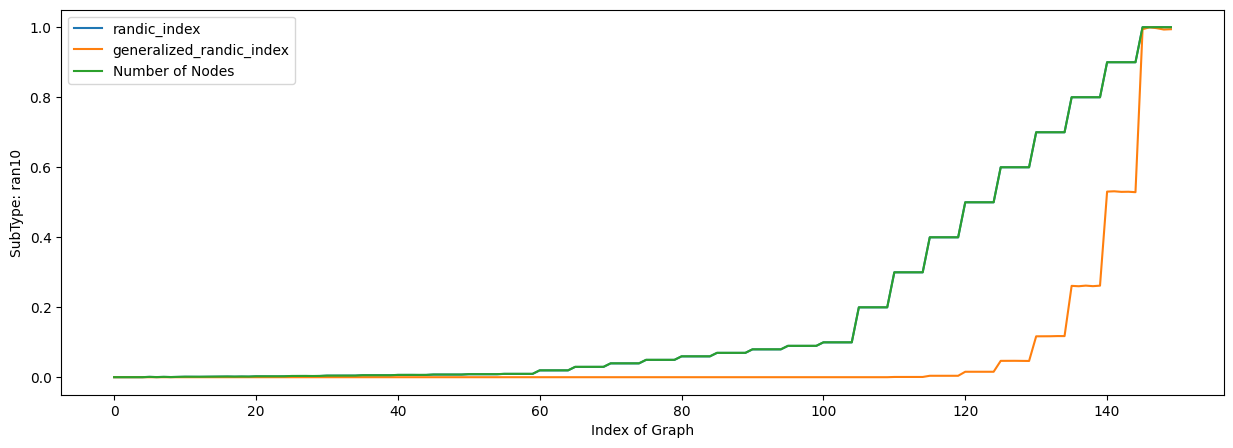

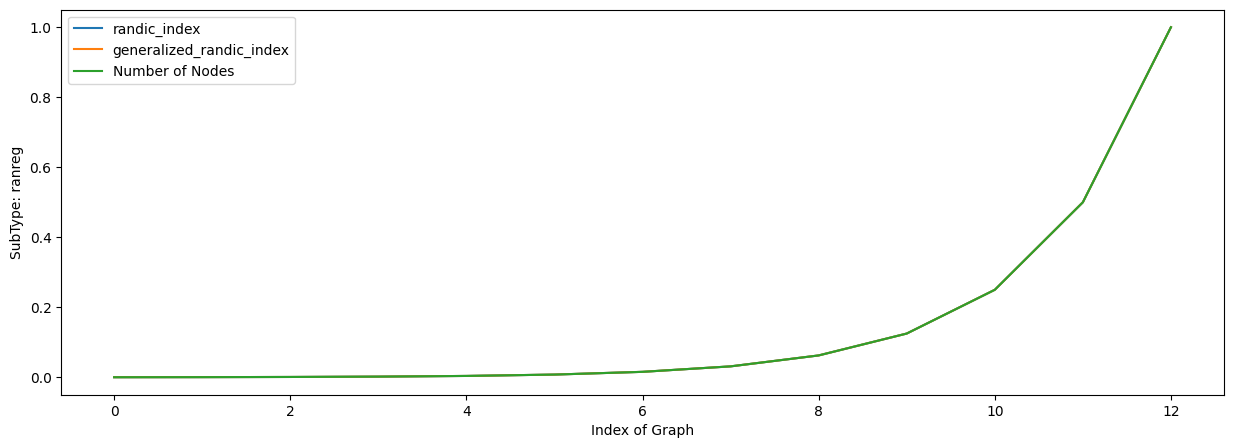

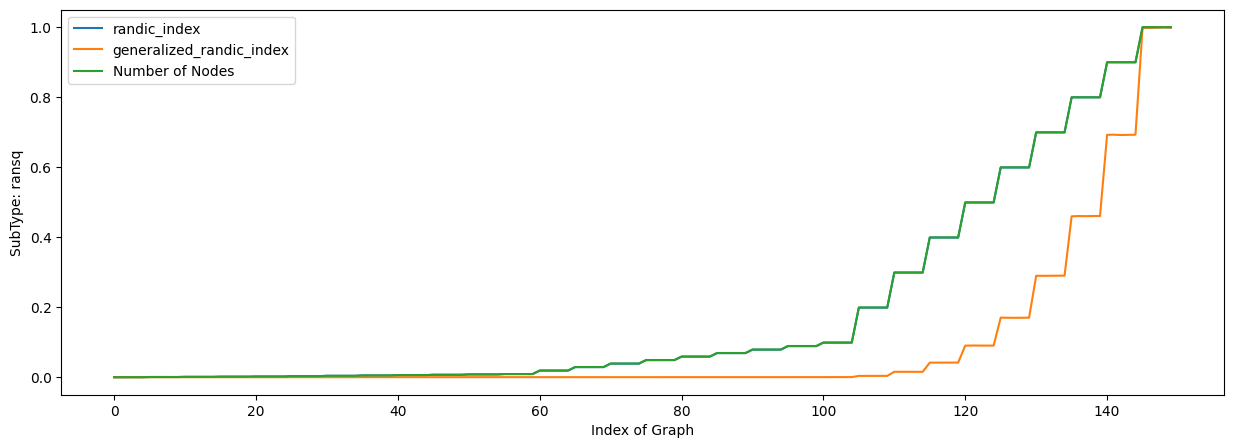

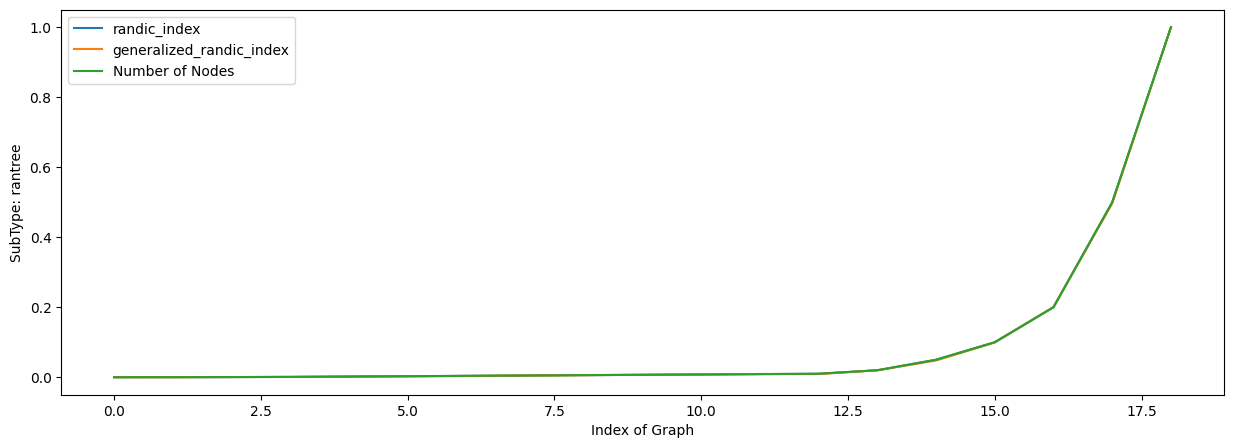

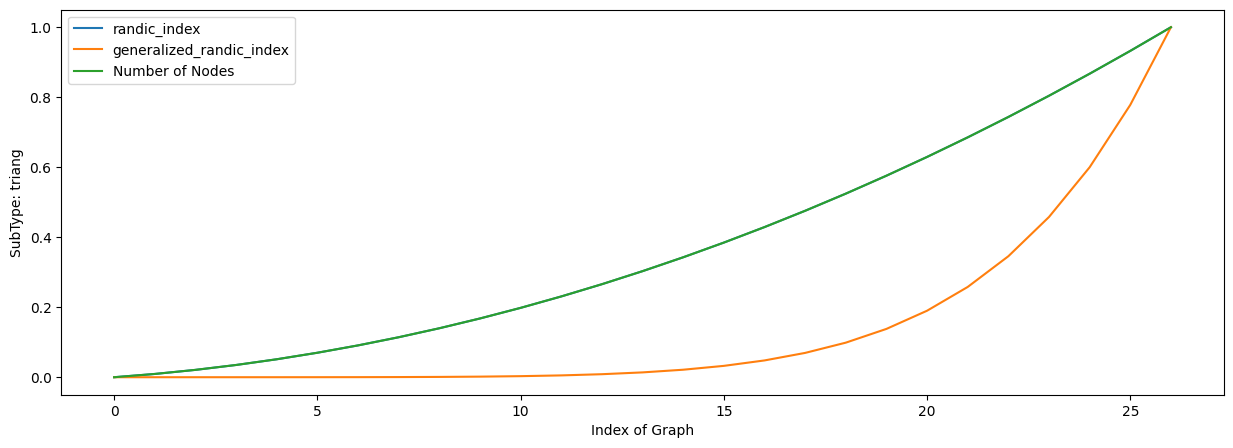

In [4]:
# plot a line diagram of the randicIndex all_graphs graphs from the orderedDataSets

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


def plot_lines_diagram(axes, dataSet, subtype, index_names, topological_indices):
    ''' Plot the randic index of all graphs in the dataset.'''
    subtype_x_index = []
    subtype_x_nodes = []
    subtype_y = {}
    for index_name in index_names:
        subtype_y[index_name] = []
    for (i, graph) in enumerate(dataSet):
        x = nx.number_of_nodes(dataSet[graph])
        subtype_x_index.append(i)
        subtype_x_nodes.append(x)
        for index_name in index_names:
            y = topological_indices[subtype][graph][index_name]
            subtype_y[index_name].append(y)

    for index_name in index_names:
        normalized_y = (subtype_y[index_name]-np.min(subtype_y[index_name]))/(np.max(subtype_y[index_name])-np.min(subtype_y[index_name]))
        axes.plot(subtype_x_index, normalized_y, label=f"{index_name}")

    normalized_number_of_nodes = (subtype_x_nodes-np.min(subtype_x_nodes))/(np.max(subtype_x_nodes)-np.min(subtype_x_nodes))
    axes.plot(subtype_x_index, normalized_number_of_nodes, label=f"Number of Nodes")


for subtype in orderedDataSets:
    fig, axes = plt.subplots(1, figsize=(15, 5))
    plot_lines_diagram(axes, orderedDataSets[subtype], subtype, ["randic_index", "generalized_randic_index"], topological_indices_all_graphs)

    plt.xlabel("Index of Graph")
    plt.ylabel(f"SubType: {subtype}")
    axes.legend()
    plt.show()